<a href="https://colab.research.google.com/github/Housenkan/ChallengeAluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from math import *
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"


loja0 = pd.read_csv(url)
loja1 = pd.read_csv(url2)
loja2 = pd.read_csv(url3)
loja3 = pd.read_csv(url4)

loja0.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
lojas = [loja0, loja1, loja2, loja3]
faturamento_cada_loja = []
numero_loja = []
for i, loja in enumerate(lojas):
  faturamento_loja = pd.DataFrame(loja)
  faturamento_total_loja = round(sum(faturamento_loja['Preço']), 2)
  faturamento_cada_loja.append(faturamento_total_loja)
  numero_loja.append(i)
  print(f'A loja{i} teve o faturamento de {faturamento_total_loja}')



A loja0 teve o faturamento de 1534509.12
A loja1 teve o faturamento de 1488459.06
A loja2 teve o faturamento de 1464025.03
A loja3 teve o faturamento de 1384497.58


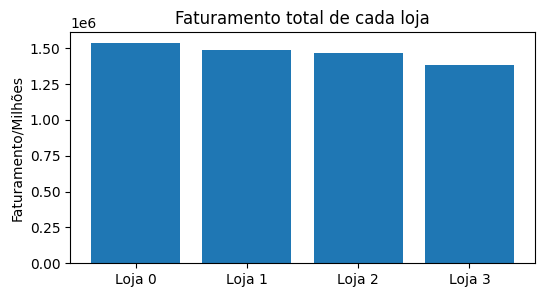

Faturamento da loja0 é igual à 1534509.12
Faturamento da loja1 é igual à 1488459.06
Faturamento da loja2 é igual à 1464025.03
Faturamento da loja3 é igual à 1384497.58


In [4]:
plt.figure(figsize = (6, 3))
plt.title('Faturamento total de cada loja')
plt.bar(numero_loja, faturamento_cada_loja)
plt.xticks(numero_loja, ['Loja 0', 'Loja 1', 'Loja 2', 'Loja 3'])
plt.ylabel('Faturamento/Milhões')
plt.show()

for i, faturamento in enumerate(faturamento_cada_loja):
  print(f'Faturamento da loja{i} é igual à {faturamento}')

# 2. Vendas por Categoria


In [5]:

qtd_produtos_por_categoria_df = []
for i, loja in enumerate(lojas):
  categorias_produtos = loja['Categoria do Produto'].value_counts()
  categorias_produtos_df = categorias_produtos.reset_index()
  categorias_produtos_df.columns = ['Categoria do Produto', 'Quantidade de Vendas']
  qtd_produtos_por_categoria_df.append(categorias_produtos_df)
  display(categorias_produtos_df)
'''
cat_prod = loja['Categoria do Produto'].value_counts()
cat_prod_loja_df = cat_prod.reset_index()
cat_prod_loja_df.columns = ['Categoria do Produto', 'Quantidade de vendas']

cat_prod1 = loja1['Categoria do Produto'].value_counts()
cat_prod_loja1_df = cat_prod1.reset_index()
cat_prod_loja1_df.columns = ['Categoria do Produto', 'Quantidade de vendas']

cat_prod2 = loja2['Categoria do Produto'].value_counts()
cat_prod_loja2_df = cat_prod2.reset_index()
cat_prod_loja2_df.columns = ['Categoria do Produto', 'Quantidade de vendas']

cat_prod3 = loja3['Categoria do Produto'].value_counts()
cat_prod_loja3_df = cat_prod3.reset_index()
cat_prod_loja3_df.columns = ['Categoria do Produto', 'Quantidade de vendas']

display(cat_prod_loja_df, cat_prod_loja3_df)
'''


,Categoria do Produto,Quantidade de Vendas
0,moveis,465
1,eletronicos,448
2,brinquedos,324
3,eletrodomesticos,312
4,esporte e lazer,284
5,instrumentos musicais,182
6,livros,173
7,utilidades domesticas,171


,Categoria do Produto,Quantidade de Vendas
0,moveis,442
1,eletronicos,422
2,brinquedos,313
3,eletrodomesticos,305
4,esporte e lazer,275
5,instrumentos musicais,224
6,livros,197
7,utilidades domesticas,181


,Categoria do Produto,Quantidade de Vendas
0,moveis,499
1,eletronicos,451
2,brinquedos,315
3,eletrodomesticos,278
4,esporte e lazer,277
5,livros,185
6,instrumentos musicais,177
7,utilidades domesticas,177


,Categoria do Produto,Quantidade de Vendas
0,moveis,480
1,eletronicos,451
2,brinquedos,338
3,esporte e lazer,277
4,eletrodomesticos,254
5,utilidades domesticas,201
6,livros,187
7,instrumentos musicais,170


"\ncat_prod = loja['Categoria do Produto'].value_counts()\ncat_prod_loja_df = cat_prod.reset_index()\ncat_prod_loja_df.columns = ['Categoria do Produto', 'Quantidade de vendas']\n\ncat_prod1 = loja1['Categoria do Produto'].value_counts()\ncat_prod_loja1_df = cat_prod1.reset_index()\ncat_prod_loja1_df.columns = ['Categoria do Produto', 'Quantidade de vendas']\n\ncat_prod2 = loja2['Categoria do Produto'].value_counts()\ncat_prod_loja2_df = cat_prod2.reset_index()\ncat_prod_loja2_df.columns = ['Categoria do Produto', 'Quantidade de vendas']\n\ncat_prod3 = loja3['Categoria do Produto'].value_counts()\ncat_prod_loja3_df = cat_prod3.reset_index()\ncat_prod_loja3_df.columns = ['Categoria do Produto', 'Quantidade de vendas']\n\ndisplay(cat_prod_loja_df, cat_prod_loja3_df)\n"

Text(0.5, 1.0, 'Loja 3 ')

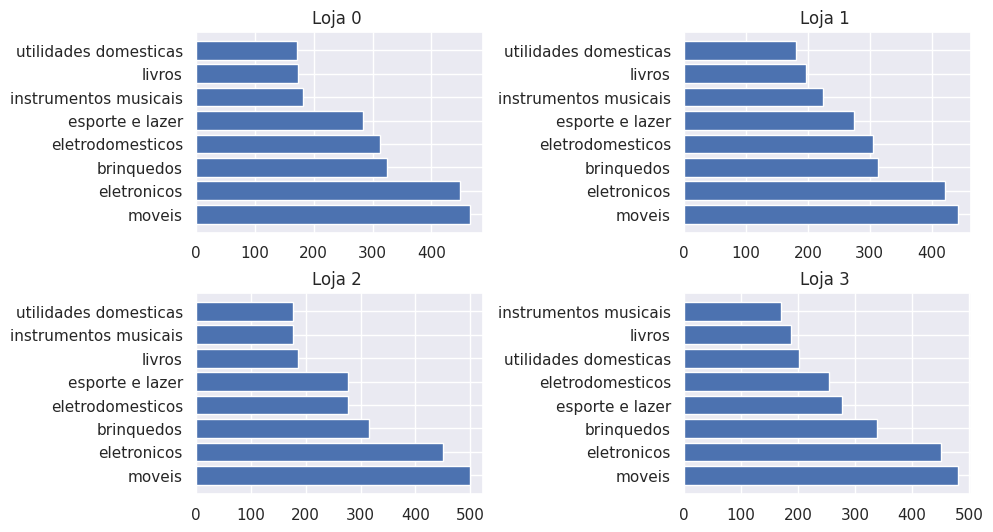

In [6]:
sns.set_theme()
'''
ax = sns.barplot(categorias_produtos_df, x='Quantidade de Vendas', y='Categoria do Produto', orient='h', palette = 'tab10')
ax.set(title='Quantidade de vendas por Categoria', xlabel='', ylabel='')
'''
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.7)
axs[0,0].barh(qtd_produtos_por_categoria_df[0]['Categoria do Produto'], qtd_produtos_por_categoria_df[0]['Quantidade de Vendas'])
axs[0,0].set_title('Loja 0 ')

axs[0,1].barh(qtd_produtos_por_categoria_df[1]['Categoria do Produto'], qtd_produtos_por_categoria_df[1]['Quantidade de Vendas'])
axs[0,1].set_title('Loja 1 ')

axs[1,0].barh(qtd_produtos_por_categoria_df[2]['Categoria do Produto'], qtd_produtos_por_categoria_df[2]['Quantidade de Vendas'])
axs[1,0].set_title('Loja 2 ')

axs[1,1].barh(qtd_produtos_por_categoria_df[3]['Categoria do Produto'], qtd_produtos_por_categoria_df[3]['Quantidade de Vendas'])
axs[1,1].set_title('Loja 3 ')

# 3. Média de Avaliação das Lojas

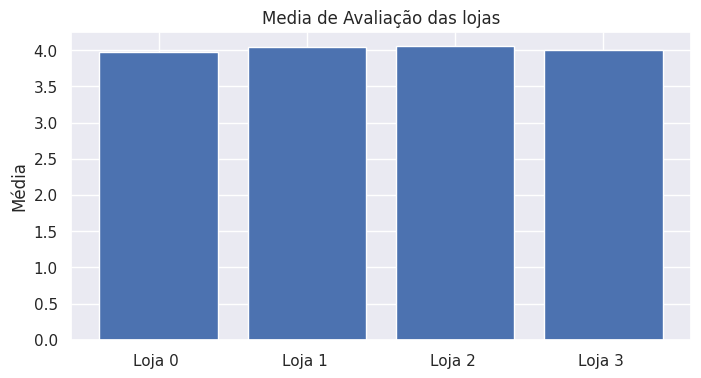

[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]


In [7]:
media_lojas = []
for i, media in enumerate(lojas):
  sats_cliente = round(media['Avaliação da compra'].mean(), 2)
  media_lojas.append(sats_cliente)

plt.figure(figsize=(8,4))
plt.title('Media de Avaliação das lojas')
plt.bar(numero_loja, media_lojas)
plt.xticks(numero_loja, ['Loja 0 ', 'Loja 1 ', 'Loja 2 ', 'Loja 3 '])
plt.ylabel('Média')
plt.show()

print(media_lojas)


# 4. Produtos Mais e Menos Vendidos

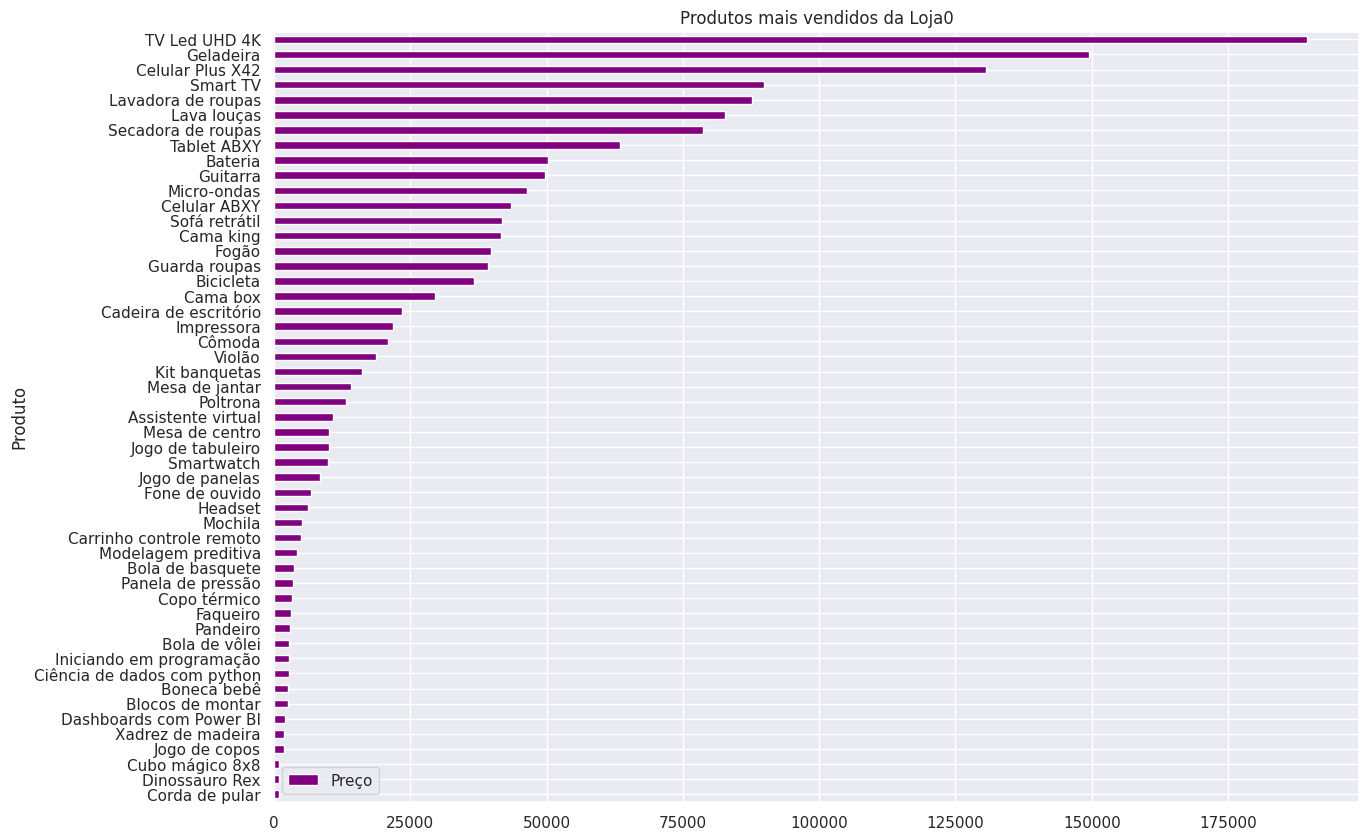

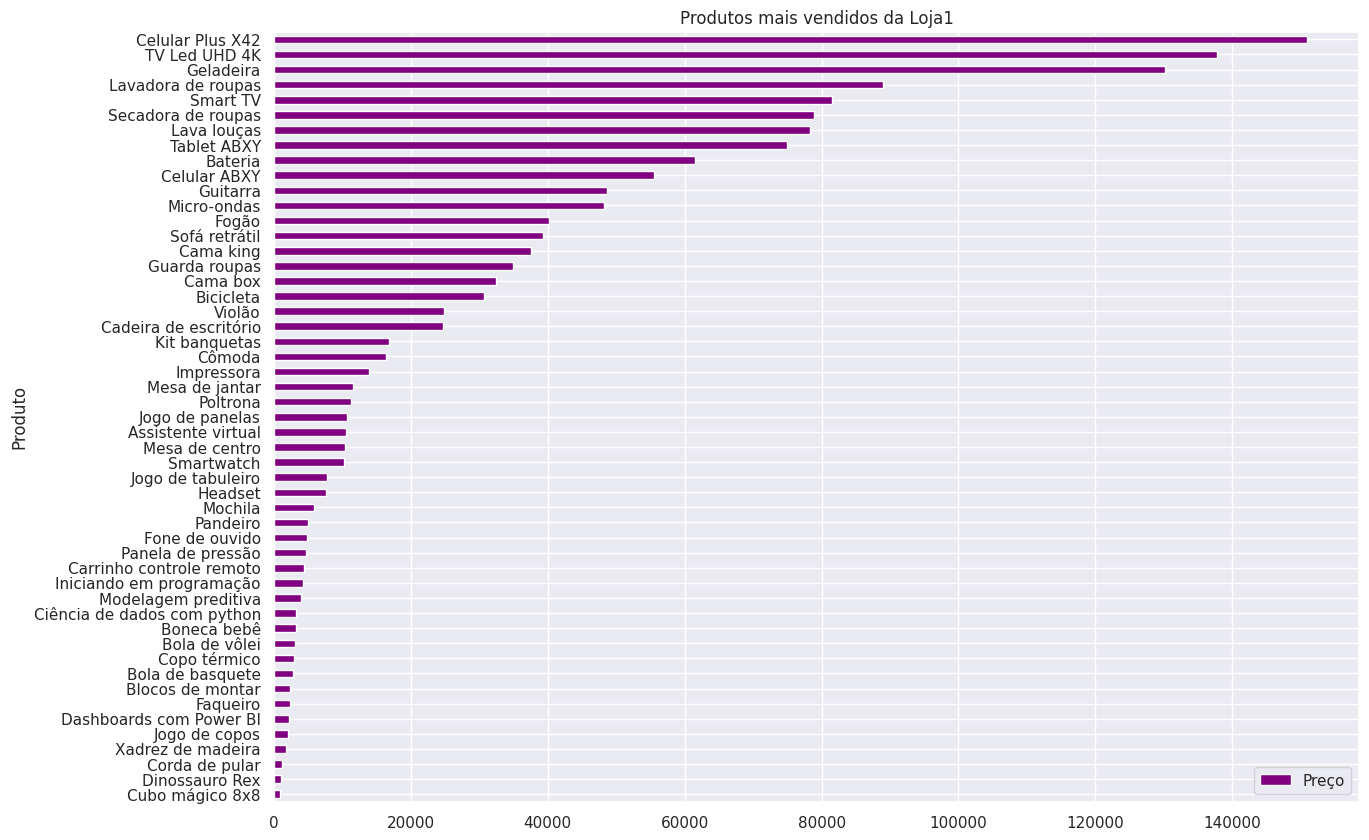

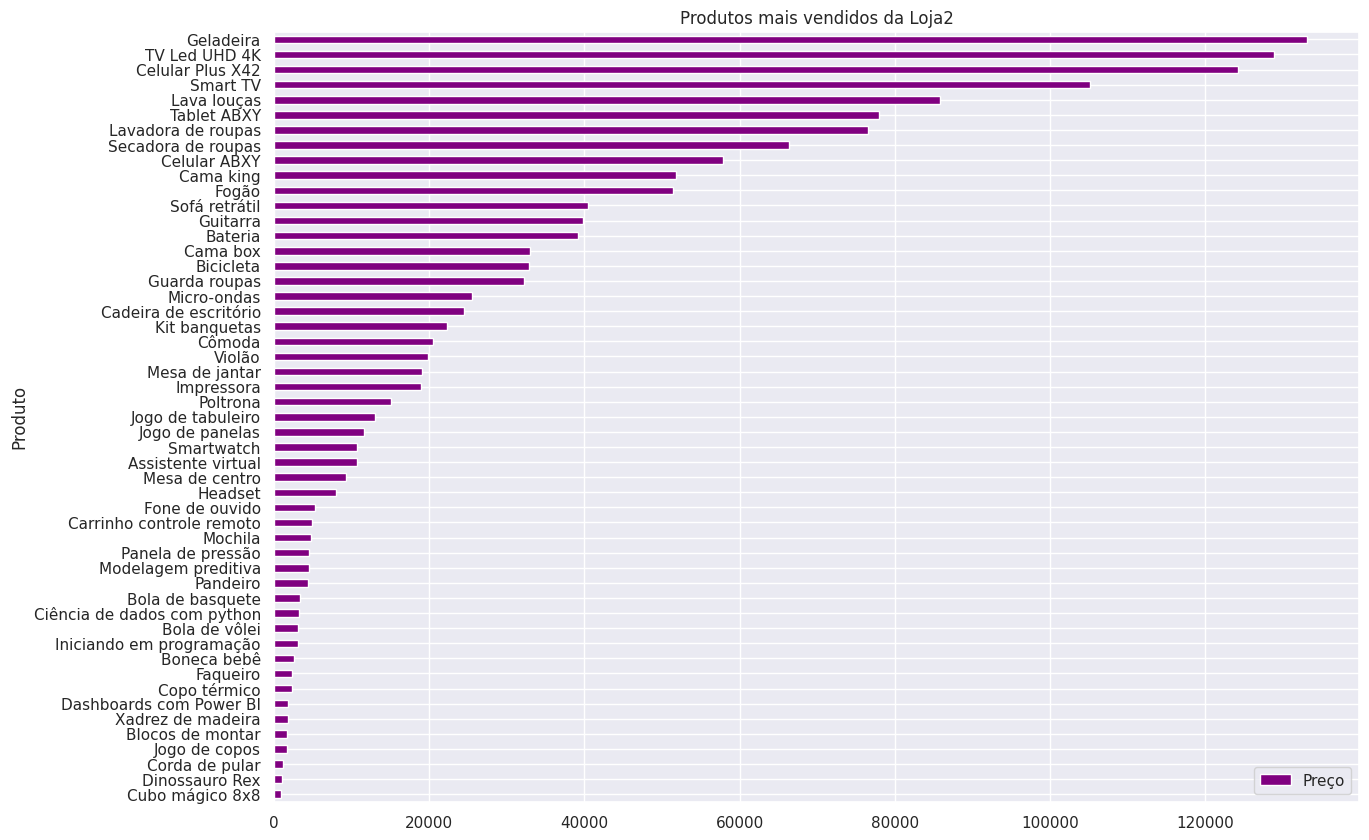

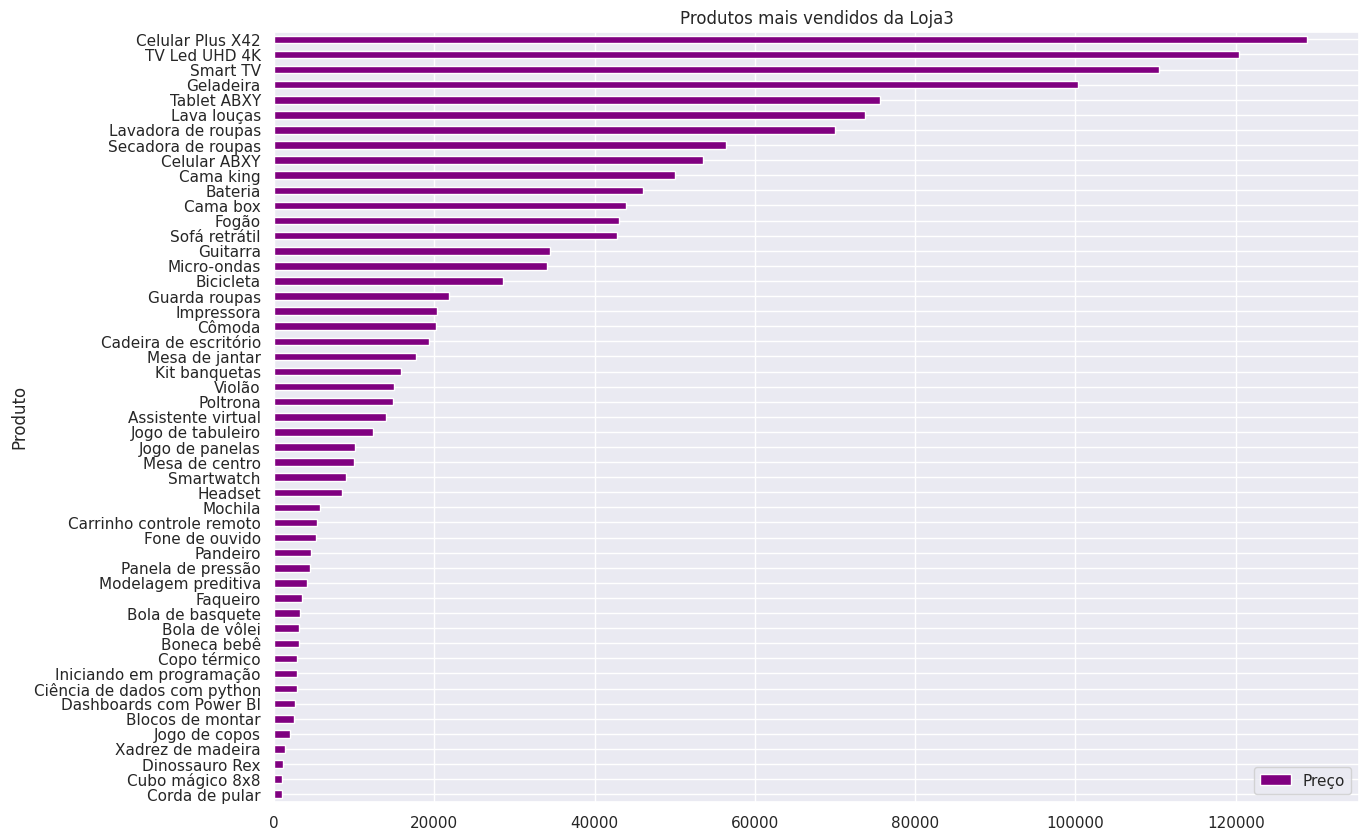

In [34]:
for i, loja in enumerate(lojas):
  prod_mais_vend = pd.DataFrame(loja.groupby('Produto')[['Preço']].sum().sort_values('Preço'))
  df_prod_mais_vend = prod_mais_vend.reset_index()
  df_prod_mais_vend.columns = ['Produto', 'Preço']
  prod_mais_vend.plot(kind = 'barh', figsize=(14,10), color = 'purple')
  plt.title(f'Produtos mais vendidos da Loja{i}')

# 5. Frete Médio por Loja
